In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('insurance_data.csv')

In [8]:
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


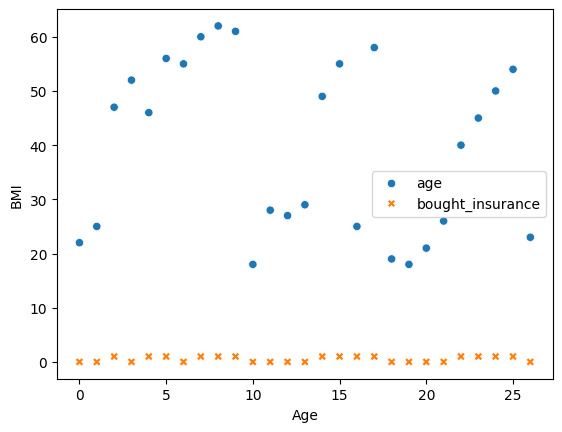

In [7]:
sns.scatterplot(df)
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()              # wrong way to plot

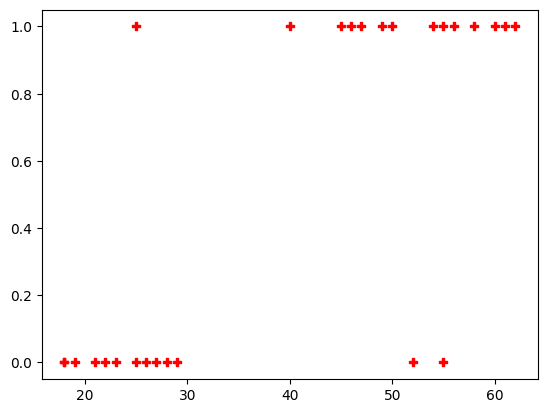

In [26]:
plt.scatter(df.age,df.bought_insurance, color = 'red', marker= 'P')

In [27]:
df.shape

(27, 2)

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x = df.drop('bought_insurance', axis = 1)
y = df.bought_insurance

In [30]:
x_train , x_test, y_train, y_test = train_test_split(x,y, test_size = 0.1)

In [37]:
x_test

,age
14,49
18,19
3,52


In [36]:
y_test

,bought_insurance
14,1
18,0
3,0


In [38]:
x_train.head()

,age
16,25
8,62
6,55
23,45
4,46


In [39]:
y_train.head()

,bought_insurance
16,1
8,1
6,0
23,1
4,1


In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
log_model = LogisticRegression()

In [45]:
log_model.fit(x_train , y_train)

LogisticRegression()

In [47]:
x_test

,age
14,49
18,19
3,52


In [46]:
log_model.predict(x_test)

array([1, 0, 1])

In [82]:
log_model.predict([[36.8], [36.9]])  # this is my thrisold value in that
# in that my model predict age 36.8 will not by incorence
#                          age 36.9 wil by incorence

array([0, 1])

In [48]:
log_model.predict_proba(x_test)

array([[0.12913235, 0.87086765],
       [0.94280575, 0.05719425],
       [0.08472932, 0.91527068]])

In [72]:
log_model.score(x_test , y_test)  # model accuracy teasting

0.6666666666666666

In [73]:
log_model.predict_log_proba(x_test)

array([[-2.04691746, -0.13826526],
       [-0.05889501, -2.8613019 ],
       [-2.46829354, -0.08853544]])

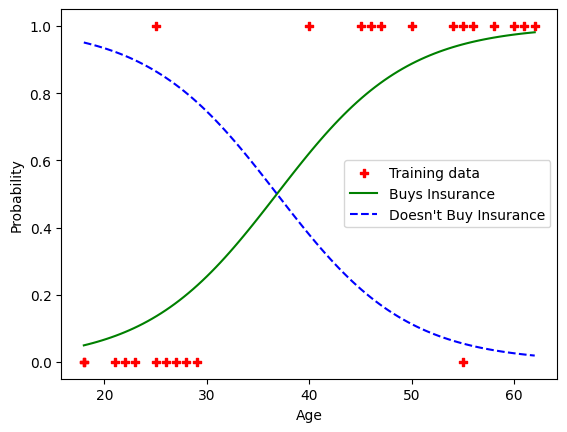

In [85]:
import numpy as np

# Create a range of values for the x-axis to plot the curve
X_new = np.linspace(x_train.min(), x_train.max(), 100).reshape(-1, 1)

# Get the predicted probabilities for the new range of values
y_proba = log_model.predict_proba(X_new)

# Plot the training data
plt.scatter(x_train, y_train, color='red', marker='P', label='Training data')

# Plot the sigmoid curve
plt.plot(X_new, y_proba[:, 1], "g-", label="Buys Insurance")
plt.plot(X_new, y_proba[:, 0], "b--", label="Doesn't Buy Insurance")

plt.xlabel("Age")
plt.ylabel("Probability")
plt.legend()
plt.show()

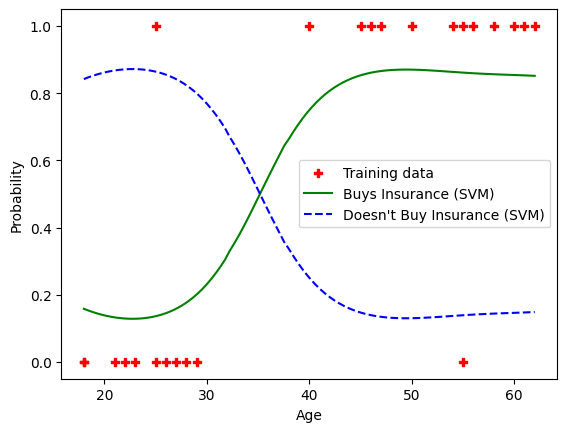

In [86]:
from sklearn.svm import SVC

# 1. Create an instance of the new model
#    We set probability=True so we can use predict_proba
svm_model = SVC(probability=True)

# 2. Train the new model on the same training data
svm_model.fit(x_train, y_train)

# 3. Use the new model to predict probabilities
y_proba_svm = svm_model.predict_proba(X_new)

# 4. Plot the results for the SVM model
plt.scatter(x_train, y_train, color='red', marker='P', label='Training data')
plt.plot(X_new, y_proba_svm[:, 1], "g-", label="Buys Insurance (SVM)")
plt.plot(X_new, y_proba_svm[:, 0], "b--", label="Doesn't Buy Insurance (SVM)")
plt.xlabel("Age")
plt.ylabel("Probability")
plt.legend()
plt.show()

Exercise
Download employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics.

1.Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)

2.Plot bar charts showing impact of employee salaries on retention

3.Plot bar charts showing corelation between department and employee retention
Now build logistic regression model using variables that were narrowed down in step 1
Measure the accuracy of the model
